In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 找到系统中支持中文的字体路径，例如 SimHei (黑体)
font_path = fm.findSystemFonts(fontpaths=None, fontext='ttf')
font_path = [f for f in font_path if 'SimHei' in f]

if font_path:
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 用 SimHei 显示中文
    plt.rcParams['axes.unicode_minus'] = False  # 解决负号无法显示的问题
else:
    print("未找到支持中文的字体，请确保系统安装了中文字体。")

未找到支持中文的字体，请确保系统安装了中文字体。


In [4]:
df = pd.read_csv(r"gdp.csv",header = None) # 不设置索引

In [5]:
df

,0,1,2,3
0,1988,386,839,763
1,2061,408,846,808
2,2335,422,960,953
3,2750,482,1258,1010
4,3356,511,1577,1268
5,3806,561,1893,1352


In [6]:
df.columns = ["total gdp","first industry",'second industry', "third industry"]
df

,total gdp,first industry,second industry,third industry
0,1988,386,839,763
1,2061,408,846,808
2,2335,422,960,953
3,2750,482,1258,1010
4,3356,511,1577,1268
5,3806,561,1893,1352


In [7]:
df.index = [2011,2012,2013,2014,2015,2016]
df.index.name = "year"
df

,total gdp,first industry,second industry,third industry
year,,,,
2011,1988,386,839,763
2012,2061,408,846,808
2013,2335,422,960,953
2014,2750,482,1258,1010
2015,3356,511,1577,1268
2016,3806,561,1893,1352


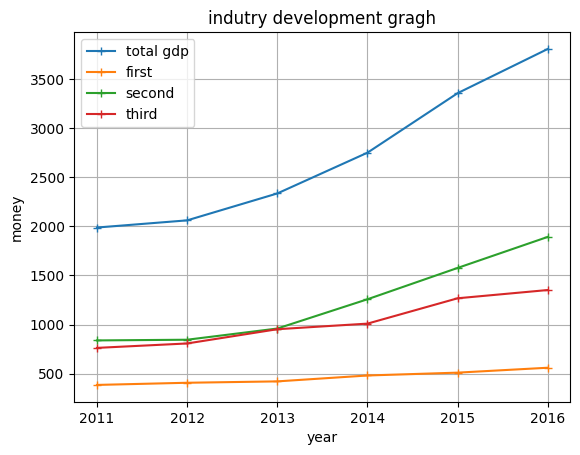

In [8]:
# 画出散
plt.plot(df.index,df['total gdp'],marker='+',label='total gdp')
plt.plot(df.index,df['first industry'],marker='+',label='first')
plt.plot(df.index,df['second industry'],marker='+',label='second')
plt.plot(df.index,df['third industry'],marker='+',label='third')
plt.title('indutry development gragh')
plt.xlabel('year')
plt.ylabel('money')
plt.legend()  # 显示图列
plt.grid(True) # 显示表格
plt.show()

In [9]:
df


,total gdp,first industry,second industry,third industry
year,,,,
2011,1988,386,839,763
2012,2061,408,846,808
2013,2335,422,960,953
2014,2750,482,1258,1010
2015,3356,511,1577,1268
2016,3806,561,1893,1352


In [16]:
meansValue = df.mean()
normalize_df = df.apply(lambda x: x / meansValue[x.name])
normalize_df

,total gdp,first industry,second industry,third industry
year,,,,
2011,0.731959,0.836101,0.682761,0.743906
2012,0.758837,0.883755,0.688458,0.787780
2013,0.859720,0.914079,0.781229,0.929152
2014,1.012518,1.044043,1.023735,0.984725
2015,1.235641,1.106859,1.283331,1.236269
2016,1.401325,1.215162,1.540486,1.318167


In [20]:
subtract_matrix_df = normalize_df.apply(lambda x: abs(x - normalize_df['total gdp']) if x.name != 'total gdp' else x)
subtract_matrix_df

,total gdp,first industry,second industry,third industry
year,,,,
2011,0.731959,0.104142,0.049197,0.011948
2012,0.758837,0.124918,0.070379,0.028944
2013,0.859720,0.054359,0.078491,0.069432
2014,1.012518,0.031525,0.011217,0.027793
2015,1.235641,0.128781,0.047690,0.000628
2016,1.401325,0.186163,0.139160,0.083158


In [22]:
# 去除total列
subtract_matrix_df = subtract_matrix_df.drop('total gdp',axis=1)


KeyError: "['total gdp'] not found in axis"

In [23]:

subtract_matrix_df

,first industry,second industry,third industry
year,,,
2011,0.104142,0.049197,0.011948
2012,0.124918,0.070379,0.028944
2013,0.054359,0.078491,0.069432
2014,0.031525,0.011217,0.027793
2015,0.128781,0.047690,0.000628
2016,0.186163,0.139160,0.083158


In [29]:
# 求矩阵中数的最大值和最小值
max_value = subtract_matrix_df.max().max()
min_value = subtract_matrix_df.min().min()
print(max_value,min_value)

0.18616302377142002 0.0006284452608860125


In [32]:
grey_matrix_df = subtract_matrix_df.apply(lambda x:(min_value + 0.5*max_value)/(x + 0.5 * max_value))
grey_matrix_df

,first industry,second industry,third industry
year,,,
2011,0.475145,0.658636,0.892228
2012,0.429863,0.573289,0.767955
2013,0.635577,0.546182,0.576630
2014,0.752048,0.898480,0.775266
2015,0.422378,0.665686,1.000000
2016,0.335584,0.403502,0.531718


In [36]:
grey_relational_coefficient_df = grey_matrix_df.mean()
grey_relational_coefficient_df


first industry     0.508432
second industry    0.624296
third industry     0.757300
dtype: float64